#TASK 1 : PREDICTIVE MODELING
* Build a regression model to predict the aggregate rating of a restaurant based o available feature
* Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrises.
* Experiment with different algorithms (e.g.,ear regression, decision treen, random forest) and compare their performancemances).

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Reading the file 
df = pd.read_csv('Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Making a copy of dataset
df_copy= df.copy(deep = True)
df_copy.dropna(axis = 0 , inplace = True)

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [5]:
#Encoding feature for better machine learning performance
df_copy['Has Table booking']=df_copy['Has Table booking'].replace({'Yes':0,'No':1})
df_copy['Has Online delivery']=df_copy['Has Online delivery'].replace({'Yes':0,'No':1})
df_copy['Is delivering now']=df_copy['Is delivering now'].replace({'Yes':0,'No':1})
df_copy['Rating color']=df_copy['Rating color'].replace({'Dark Green':5,'Green':4,'Yellow':3,'Orange':2,'Red':1,'White':0})
df_copy['Rating text']=df_copy['Rating text'].replace({'Excellent':5,'Very Good':4,'Good':3,'Average':2,'Poor':1,'Not rated':0})

In [6]:
#Selecting features for models
features = ['Country Code','Longitude','Latitude','Average Cost for two','Has Table booking','Has Online delivery','Is delivering now',
           'Price range','Rating color','Rating text','Votes']

In [7]:
#Getting data ready for model fitting
X = df_copy[features]
y =df_copy['Aggregate rating']

In [8]:
#Assigning values and setting test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [9]:
#Fitting and predicting the model
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

array([0.25236633, 4.83900896, 2.76390364, ..., 0.4335131 , 0.43304465,
       2.63255163])

In [10]:
#Evaluating the score of the model
print('Model name : Linear Regression')
mse = mean_squared_error(y_test,y_pred)
print('Mean Squred Error : ',mse.round(2))

r2 = r2_score(y_test,y_pred)
print('R-Squared Score : ',r2.round(2))

Model name : Linear Regression
Mean Squred Error :  0.21
R-Squared Score :  0.91


In [11]:
#Fitting and predicting the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train,y_train)

y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([0. , 4.4, 2.7, ..., 0. , 0. , 2.7])

In [12]:
#Evaluating the score of the model
print('Model name : Decision Tree')
mse_tree = mean_squared_error(y_test,y_pred_tree)
print('Mean Squred Error : ',mse_tree.round(2))

r2_tree = r2_score(y_test,y_pred_tree)
print('R-Squared Score : ',r2_tree.round(2))

Model name : Decision Tree
Mean Squred Error :  0.06
R-Squared Score :  0.98


In [13]:
#Fitting and predicting the model
forest_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
forest_model.fit(X_train,y_train)

y_pred_forest = forest_model.predict(X_test)
y_pred_forest

array([0.   , 4.211, 3.122, ..., 0.   , 0.   , 3.157])

In [14]:
#Evaluating the score of the model
print('Model name : Random Forest')
mse_forest = mean_squared_error(y_test,y_pred_forest)
print('Mean Squred Error : ',mse_forest.round(2))

r2_forest = r2_score(y_test,y_pred_forest)
print('R-Squared Score : ',r2_forest.round(2))

Model name : Random Forest
Mean Squred Error :  0.03
R-Squared Score :  0.99


In [15]:
#Comparing the values of all used models
mse_values = {'Linear Regression':0.21,'Decision Tree': 0.06,'Random Forest':0.03}
r2_values = {'Linear Regression':0.91,'Decision Tree': 0.98,'Random Forest':0.99}
comparision = pd.DataFrame({'MSE':mse_values,'R2':r2_values}).T
comparision

,Linear Regression,Decision Tree,Random Forest
MSE,0.21,0.06,0.03
R2,0.91,0.98,0.99


TASK 2 : CUSTOMER PREFERENCE ANALYSIS
* Analyze the relationship between the type of cuisine and the restaurant's rating
* Identify the most popular cuisines among customers based on the number of votes
* Determine if there are any specific cuisines that tend to receive higher ratings...

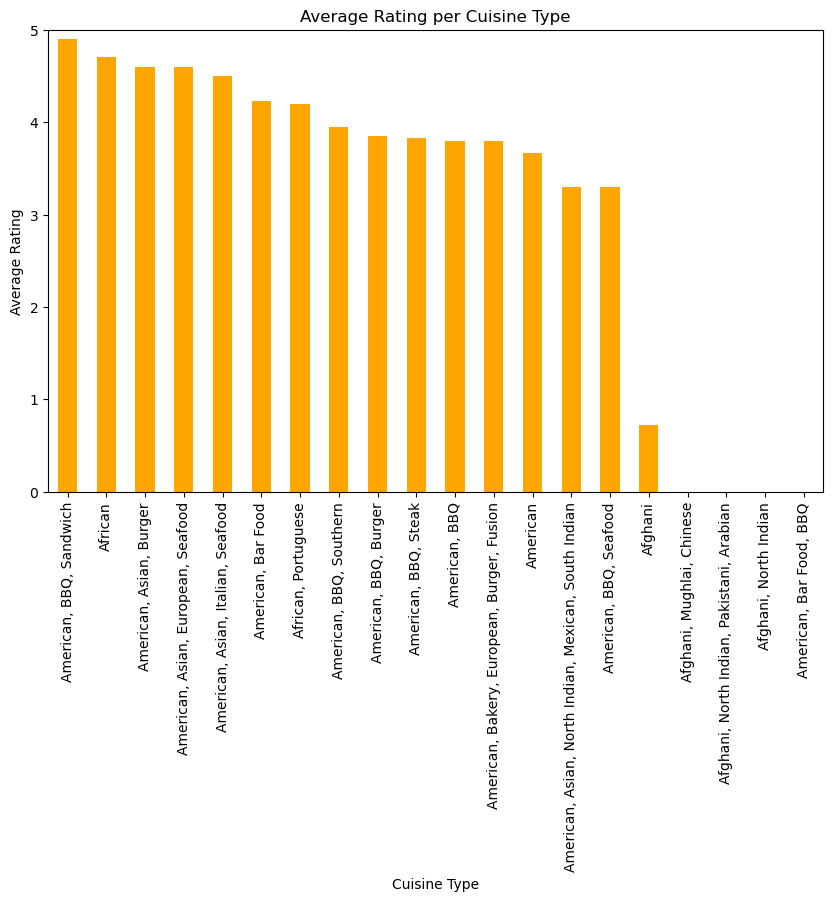

In [17]:
#Plotting the bar graph of average rating of cuisines based on aggregate rating
average_rating_per_cuisine = df_copy.groupby('Cuisines')['Aggregate rating'].mean().head(20).sort_values(ascending = False)

plt.figure(figsize=(10, 6))
average_rating_per_cuisine.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Average Rating per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming ratings are between 0 and 5
plt.xticks(rotation=90)
plt.show()

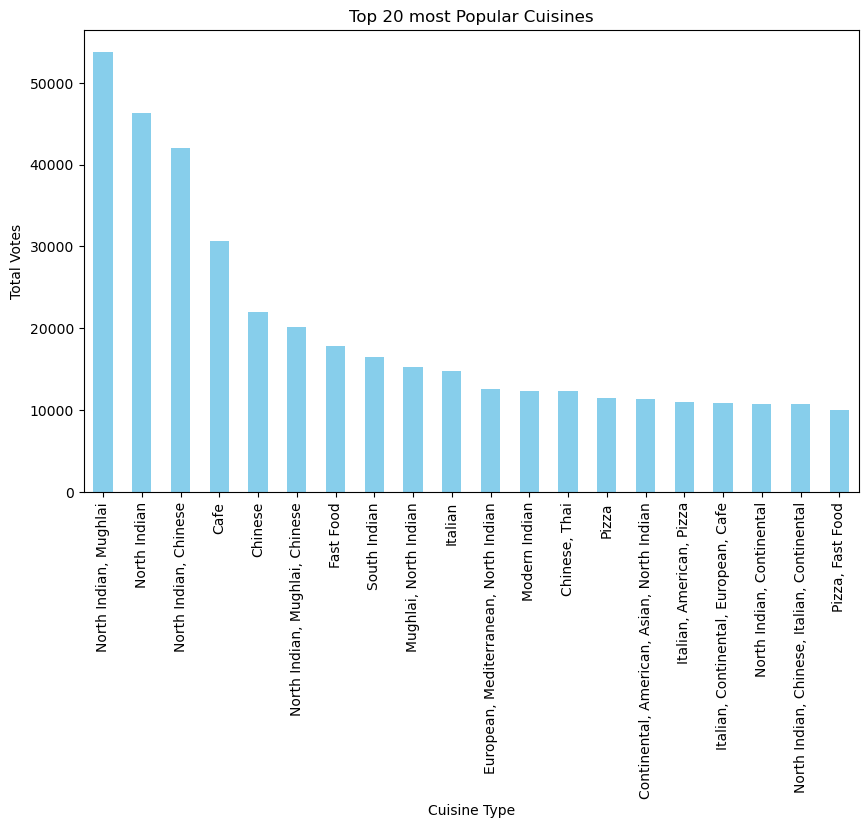

In [18]:
#Plotting the bar graph for total votes per cuisines
total_votes_per_cuisine = df_copy.groupby('Cuisines')['Votes'].sum().sort_values(ascending = False).head(20)

plt.figure(figsize=(10,6))
total_votes_per_cuisine.plot(kind='bar',color='skyblue')
plt.title('Top 20 most Popular Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Votes')
plt.show()

In [19]:
#Splitting individual cusinies on its own rows and replacing wrong names
df_copy['Cuisines'] = df_copy['Cuisines'].str.split(',')
df_copy = df_copy.explode('Cuisines')
df_copy['Cuisines'] = df_copy['Cuisines'].str.strip()

df_copy['Cuisines'] = df_copy['Cuisines'].replace({'B�_rek':'Börek','D�_ner':'Döner Kebab'})

In [20]:
#Individual most rated Cuisines
average_rating = df_copy.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending= False)
print('Top 10 most rated Cuisines are :',average_rating.head(10))

Top 10 most rated Cuisines are : Cuisines
Sunda          4.900000
Börek          4.700000
Taiwanese      4.650000
Ramen          4.500000
Dim Sum        4.466667
Hawaiian       4.412500
Döner Kebab    4.400000
Bubble Tea     4.400000
Curry          4.400000
Kebab          4.380000
Name: Aggregate rating, dtype: float64


TASK 3 : DATA VISUALIZATION
* Create visualizations to represent the distribution of ratings using different charts (histogram, bar graph, plot, etc)
* Compare the average ratings of different cuisines or cities using appropriate visualizations
* Visualize the relationship between various features and the target variable to gain insights...

C:\Users\gaura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


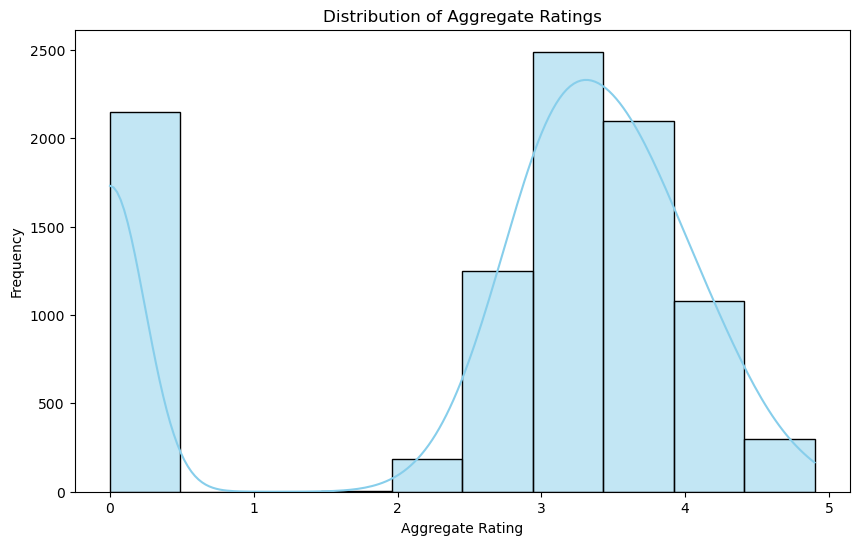

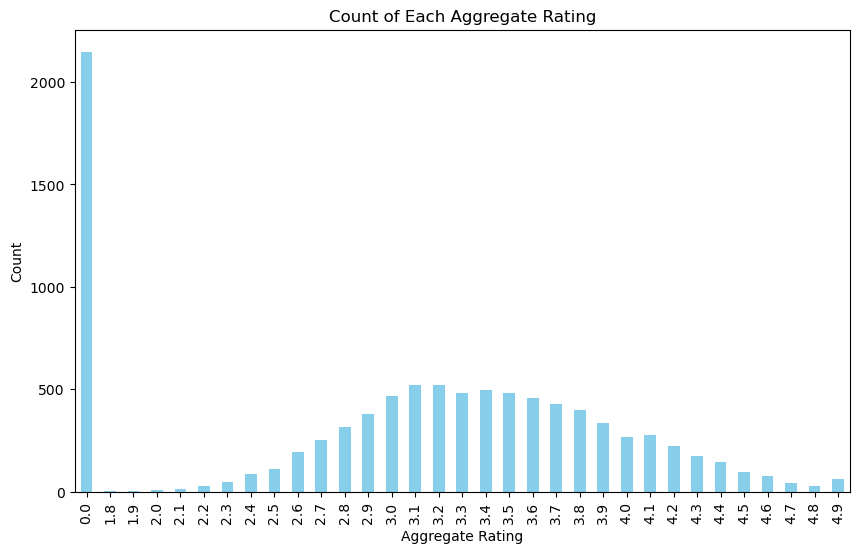

In [21]:
# Histogram to show the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

# Bar graph to show the count of each rating
plt.figure(figsize=(10, 6))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Each Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

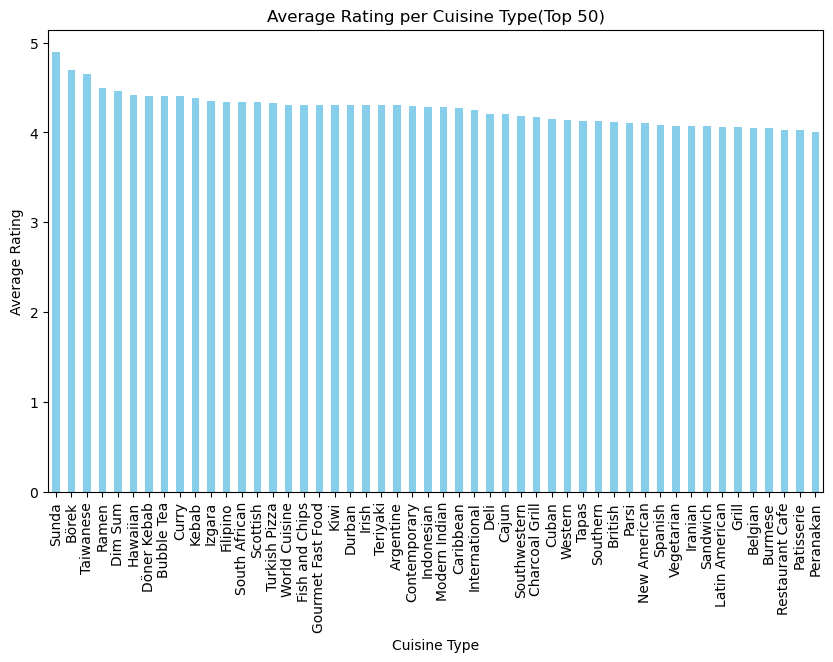

In [22]:
# Visualize the average ratings for cuisines
plt.figure(figsize=(10,6))
average_rating.head(50).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Rating per Cuisine Type(Top 50)')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

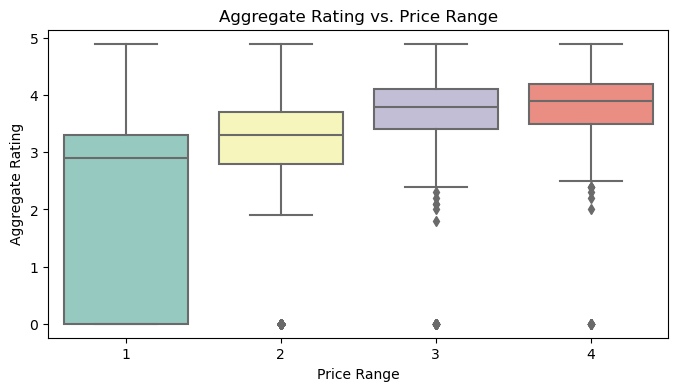

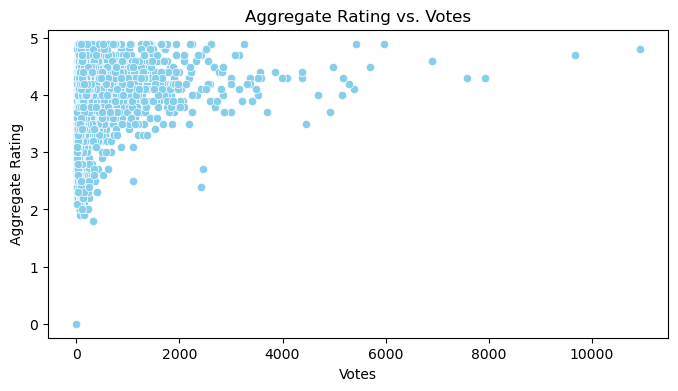

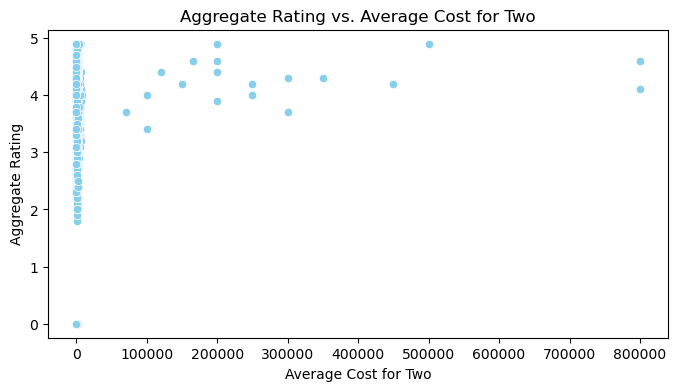

In [23]:
#Box plot for relationship between price range and aggregate rating
plt.figure(figsize=(8, 4))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set3')
plt.title('Aggregate Rating vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

#Scatter plot for relationship between votes and ratings
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='skyblue')
plt.title('Aggregate Rating vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')

## Scatter plot for relationship between average cost and ratings
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, color='skyblue')
plt.title('Aggregate Rating vs. Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()